# Assignments 

Under some conditions, one might want a meta-species amount to be a function of other species. A more classic example lies in expressing the concentration of a species using the amount of free ligands from a hill function. For those cases, MobsPy assignments are the solution. 

There are two available notations for assignments. The first one lies in using the "assign" keyword with the dot operator accompanied by parenthesis. Inside the parenthesis, the user can write an operation with the meta-species that will define the assignment.
The expression must be written inside the context of the parenthesis, as outside the parenthesis, the sum of two meta-species is used for reactions, and the product is used to create new meta-species. 

As an example, we assign the value of a meta-species A according to a hill function with ligand L. 


In [1]:
from mobspy import *

A, L = BaseSpecies()

A.assign(L**2/(L**2 + 100))

S = Simulation(A | L)
print(S.compile())

Compiling model



Species
A,0
L,0

Mappings
A :
A
L :
L

Parameters
volume,1

Reactions

Assignments
assignment_0,{'species': 'A', 'expression': '(((L)^2)/(((L)^2)+100))'}



The other assignment notation uses the Assign context with Python's native "with". Inside the Assign context, operations between meta-species follow the same rules when inside the parenthesis of the "assign" using the dot operator.  
One can then assign this operation to meta-species using the call operator inside the context. 
Below, we rewrite this section's first example using the alternative syntax. 

In [2]:
from mobspy import *

A, L = BaseSpecies()

with Assign:
    r = L**2/(L**2 + 100)
    A(r)

S = Simulation(A | L)
print(S.compile())

Compiling model



Species
A,0
L,0

Mappings
A :
A
L :
L

Parameters
volume,1

Reactions

Assignments
assignment_0,{'species': 'A', 'expression': '(((L)^2)/(((L)^2)+100))'}



Different from other meta-species, assignments are not consumed when engaging in reactions. 
Their amount is only dictated by the operation assigned to them.
It can be better seen in the example below, where A is in a reaction that indicates it would be consumed to produce P. However, it remains constant as it was assigned to be the value of 1.

Compiling model
Starting Simulator
Simulation is Over


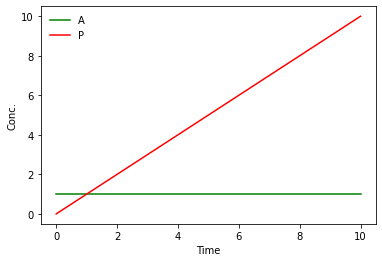

In [3]:
from mobspy import *

A, P = BaseSpecies()

A.assign(1)

A >> P [1]

S = Simulation(A | P)
S.duration = 10
S.run()

Meta-species can also have substates as assigned an expression by using the dot operator query. Similarly to initial values, the characteristic spaces not specified in the query will be replaced by the default of that respective inheritor. To perform the assignment of a specific state, one must query first for the characteristics and then follow with the assigned keyword. 

Furthermore, dot operator queries can be performed for meta-species in the operation itself. When a meta-species is used to construct an operation for an assignment, the sum of the amounts of all states will be considered. The query allows one to specify the sum of some states.

Below, we supply an example for visualization. 

In [4]:
from mobspy import *

A, B = BaseSpecies()
A.a1, A.a2, B.b1, B.b2, B.b3

A.a1.assign(B**2)
A.a2.assign(B.b1**2)

S = Simulation(A | B)
print(S.compile())

Compiling model



Species
A.a1,0
A.a2,0
B.b1,0
B.b2,0
B.b3,0

Mappings
A :
A.a1
A.a2
B :
B.b1
B.b2
B.b3

Parameters
volume,1

Reactions

Assignments
assignment_0,{'species': 'A.a1', 'expression': '((B.b1+B.b2+B.b3)^2)'}
assignment_1,{'species': 'A.a2', 'expression': '((B.b1)^2)'}



Assignments are compatible with units, and consistency between unit operations is checked. 